<a href="https://colab.research.google.com/github/Bast-94/ML-BIO/blob/drafts-molecule/1_molecules_representations_etudiants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install rdkit
!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



*1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.*

In [2]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToImage
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import SDMolSupplier
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [3]:
paracetamol = MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

*2. Visualize its structure*

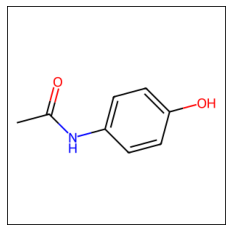

In [4]:
paracetamol_img = MolToImage(paracetamol)
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(paracetamol_img)
plt.show()

*3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?*

Vérifions avec la méthode `GetNumAtoms`

In [5]:
number_of_atoms = paracetamol.GetNumAtoms()
print("Number of atoms: ", number_of_atoms)

Number of atoms:  11


Nous obtenous effectivement 11, nous pouvons supposer que `GetNumAtoms` ommet volontairement les atomes d'hydrogène. Regardons la liste des atomes du paracétamol avec la méthode `GetAtoms`.

*4. Print out the list of atoms.*

In [6]:
for atom in paracetamol.GetAtoms():
    print(atom.GetSymbol(), end=" ")

C C O N C C C C O C C 

On remarque effectivement que les atomes d'hydrogène ne sont pas présents, ce qui justifie le fait que seul 11 atomes soient comptés.

*5. Find the number of bonds.*

In [7]:
bonds_number = paracetamol.GetNumBonds()
print(f"Il y a {bonds_number} liaisons")

Il y a 11 liaisons


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


**1. Download this file and save it in a folder.**

In [8]:
! wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf -o log.txt -O DB00295.sdf
! test -f DB00295.sdf && echo "File downloaded" || echo "File not downloaded"
! rm log.txt

File downloaded


**2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"**

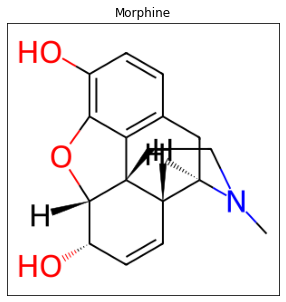

In [9]:
suppl = SDMolSupplier("DB00295.sdf")
fig = plt.figure(figsize=(len(suppl) * 5, 5))
fig.set_facecolor("white")
for i, mol in enumerate(suppl):
    ax = fig.add_subplot(1, len(suppl), i + 1)
    molimg = MolToImage(mol)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(molimg)
    ax.set_title(mol.GetProp("GENERIC_NAME"))
    plt.show()

**3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.**

In [10]:
morphine = suppl[0]
bit_vector = np.array(GetMorganFingerprintAsBitVect(morphine, 2, nBits=1024))
assert np.all((bit_vector == 0) | (bit_vector == 1))
bit_vector.shape

(1024,)

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



**1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.**


In [11]:
def get_non_zero(molecule):
    bit_vector = np.array(GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024))
    return np.nonzero(bit_vector)

In [12]:
paracetamol = MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
get_non_zero(paracetamol)

(array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
         745,  754,  792,  807,  843,  849,  893, 1017]),)

**2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".**

In [13]:
aspirin = MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
get_non_zero(aspirin)

(array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
         592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
         967, 1017]),)

**3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.**

In [14]:
from rdkit.DataStructs import DiceSimilarity

paracetamol_bit_vector = GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024)
aspirin_bit_vector = GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)
DiceSimilarity(paracetamol_bit_vector, aspirin_bit_vector)

0.37209302325581395

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [15]:
paracetamol = MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
desc_names = [desc_name for desc_name, _ in Descriptors.descList]
description = MolecularDescriptorCalculator(desc_names).CalcDescriptors(paracetamol)
df = pd.DataFrame({"Descriptor": desc_names, "Value": description})
df.head()

,Descriptor,Value
0,MaxEStateIndex,10.524469
1,MinEStateIndex,-0.115102
2,MaxAbsEStateIndex,10.524469
3,MinAbsEStateIndex,0.115102
4,qed,0.595026


## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).

((0, 1, 2), (1, 2, 3), (2, 3, 4))
(0, 1, 2, 1, 2, 3, 2, 3, 4)
Match for CCCCC
No match for CCOCC
No match for CCNCC
No match for CC(=O)Nc1ccc(O)cc1
No match for CC(=O)Nc1ccc(O[13CH3])cc1
No match for CN(C(=O)C(Cl)Cl)c1ccc(O)cc1


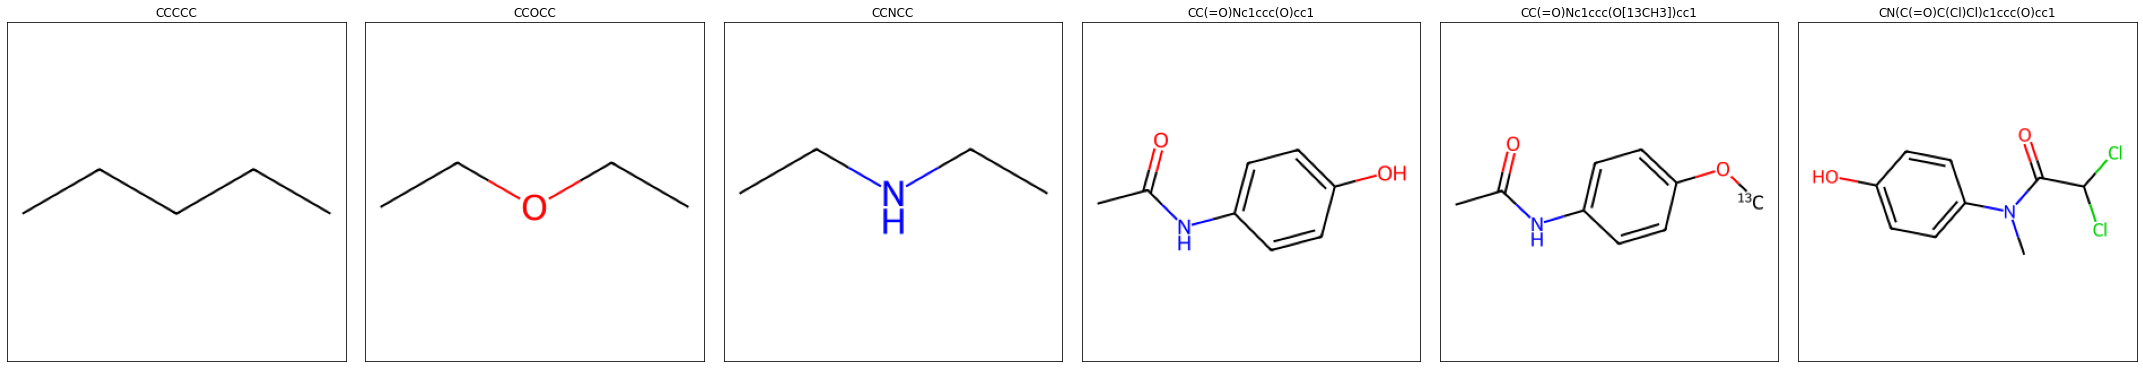

In [107]:
smiles_list = [
    "CCCCC",
    "CCOCC",
    "CCNCC",
    "CC(=O)NC1=CC=C(O)C=C1",
    "CC(=O)NC1=CC=C(O[13CH3])C=C1",
    "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1",
]
fig = plt.figure(figsize=(len(smiles_list) * 5, 5))
fig.set_facecolor("white")

pattern = Chem.MolFromSmarts("CCC")
mol_list = [MolFromSmiles(smiles) for smiles in smiles_list]
for i, mol in enumerate(mol_list):
    ax = fig.add_subplot(1, len(smiles_list), i + 1)

    ax.set_xticks([])
    ax.set_yticks([])
    substructs = mol.GetSubstructMatches(pattern)
    molimg = MolToImage(mol)
    ax.imshow(molimg)
    ax.set_title(f"{Chem.MolToSmiles(mol)}")

    if mol.HasSubstructMatch(pattern):
        print(f"Match for {Chem.MolToSmiles(mol)}")
    else:
        print(f"No match for {Chem.MolToSmiles(mol)}")

plt.tight_layout()
plt.show()

Nous remarquons qu'une seul molécule correspond au pattern `CCC` c'est la molécule à la notation SMILE `CCCCC`.

**2. Highlight the pattern "CCC" in these molecules**

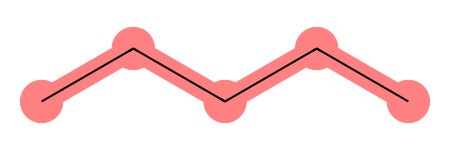

In [122]:
matching_mol = mol_list[0]
matching_mol.GetSubstructMatches(pattern)
matching_mol

**3. Do the same thing ex 1 but for the pattern "C(=O)N".**

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


**1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".**

In [123]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-22 15:25:58--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.08s   

2023-09-22 15:25:59 (15.8 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]




**2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.**

In [132]:
molecule_list = SDMolSupplier(fileName="solubility.train.sdf", removeHs=False)

In [141]:
print(f"Il y a {len(molecule_list)} molécules dans le fichier")

Il y a 1025 molécules dans le fichier



**3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.**

In [136]:
def calculate_descriptor(molecule):
    desc_names = [desc_name for desc_name, _ in Descriptors.descList]
    description = MolecularDescriptorCalculator(desc_names).CalcDescriptors(molecule)
    return np.array(description)

**4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.**

In [151]:
df_dict = {}
for mol in molecule_list:
    df_dict[mol.GetProp("NAME")] = calculate_descriptor(mol)
df = pd.DataFrame(df_dict)

In [152]:
df.head()

,n-pentane,cyclopentane,n-hexane,2-methylpentane,"2,2-dimethylbutane",cyclohexane,methylcyclopentane,n-heptane,methylcyclohexane,n-octane,...,Testosterone_Propionate,Rotenone,Phenothrin,Delmadinone_Acetate,Thiopropazate,Prednisolone-21-Trimethylacetate,Glycocholic_Acid,Rolitetracycline,Hydrocortisone_Tebutate,Natamycin
0,2.211806,1.500000,2.231806,2.253472,2.243056,1.500000,2.340278,2.245694,2.360278,2.255899,...,11.903101,13.517073,12.479392,12.738634,10.897226,13.185826,12.042248,13.125689,13.235654,12.263757
1,1.343750,1.500000,1.355000,0.898148,0.541667,1.500000,1.046296,1.361111,1.035880,1.364796,...,-0.041095,-0.455218,-0.118629,-1.051411,-0.199830,-1.627805,-1.044559,-2.328350,-1.605971,-2.099513
2,2.211806,1.500000,2.231806,2.253472,2.243056,1.500000,2.340278,2.245694,2.360278,2.255899,...,11.903101,13.517073,12.479392,12.738634,10.897226,13.185826,12.042248,13.125689,13.235654,12.263757
3,1.343750,1.500000,1.355000,0.898148,0.541667,1.500000,1.046296,1.361111,1.035880,1.364796,...,0.041095,0.022773,0.021208,0.023663,0.199830,0.003051,0.066834,0.037157,0.033093,0.078936
4,0.468786,0.408362,0.462954,0.483890,0.424482,0.422316,0.421791,0.476310,0.436570,0.480611,...,0.673250,0.739996,0.490610,0.636542,0.583226,0.648763,0.410290,0.574043,0.619599,0.156889


**5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.**

In [155]:
sol_list = [float(mol.GetProp("SOL")) for mol in molecule_list]

In [156]:
sol_list[:5]

[-3.18, -2.64, -3.84, -3.74, -3.55]



**6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?**



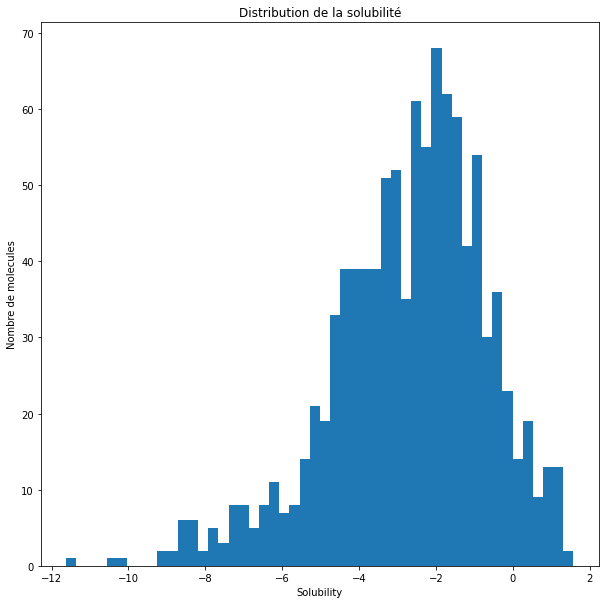

In [160]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.hist(sol_list, bins=50)
ax.set_xlabel("Solubility")
ax.set_ylabel("Nombre de molecules")
ax.set_title("Distribution de la solubilité")
plt.show()

On peut remarquer que la distribution des valeurs de la log-solubilité est centrée autour de -2. On peut donc supposer que la majorité des molécules sont peu soluble dans l'eau.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [17]:
# 1. Download the file
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-09-22 13:38:27--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 327938 (320K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 320.25K  --.-KB/s    in 0.04s   

2023-09-22 13:38:27 (7.21 MB/s) - ‘solubility.test.sdf’ saved [327938/327938]

